In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from abtem import *
from ase import Atoms

## Relative STEM-HAADF intensity of single atoms

In [23]:
atoms_1 = Atoms([6], positions=[(2.5,2.5,2.5)], cell=(5,5,5))
atoms_2 = Atoms([14], positions=[(2.5,2.5,2.5)], cell=(5,5,5))
probe = Probe(energy=60e3, semiangle_cutoff=30)
detector = AnnularDetector(inner=50, outer=200)

In [24]:
samplings = np.geomspace(.01, .05, 25)
ratios = np.zeros_like(samplings)

for i, sampling in enumerate(tqdm(samplings)):
    potential_1 = Potential(atoms_1, sampling=sampling, slice_thickness=.5, projection='finite', parametrization='kirkland')
    exit_wave_1 = probe.multislice((2.5,2.5), potential_1, pbar=False)
    
    potential_2 = Potential(atoms_2, sampling=sampling, slice_thickness=.5, projection='finite', parametrization='kirkland')
    exit_wave_2 = probe.multislice((2.5,2.5), potential_2, pbar=False)
    
    ratios[i] = detector.detect(exit_wave_1) / detector.detect(exit_wave_2)

Text(0, 0.5, 'Error [%]')

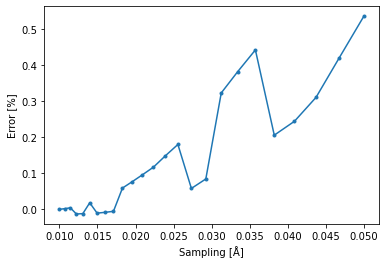

In [25]:
plt.plot(samplings, (ratios - ratios[0]) / ratios[0] * 100, '.-')
plt.xlabel('Sampling [Å]')
plt.ylabel('Error [%]')